In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment5.ipynb")

# Hierarchical Clustering and Gaussian Mixture Models (GMMs)

Please complete the following assignment. Run all cells and submit your completed notebook through Gradescope.

- Hierarchical clustering is a form of clustering that produces a **set of nested clusters organized in a tree**. It is visualized using a **Dendrogram** (tree-like diagram)

#### In this assignment, the aim is to test your knowledge of Hierarchical clustering and GMMs

$$
\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$


Where:
- $\gamma_{ik}$ is the responsibility of component $k$ for data point $i$.
- $\pi_k$ is the `weight` (or mixing coefficient) for component $k$.
- $\mathcal{N}(x_i \mid \mu_k, \Sigma_k)$ is the Gaussian probability density function for data point $x_i$ given `mean $\mu_k$` and `covariance $\Sigma_k$`.
- $K$ is the total number of components.


<!-- BEGIN QUESTION -->

#### 1. In hierarchical clustering, the dendrogram is used to

    A) Visualize the data distribution
    B) Represent the hierarchy of clusters
    C) Compute the distance between clusters
    D) Perform dimensionality reduction

In [2]:
def ans1():
    return "A"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 2. Which of the following is **not** an assumption of Gaussian Mixture Models?
    A) Data is generated from a mixture of Gaussian distributions
    B) Clusters are independent
    C) Each cluster has its own mean and covariance
    D) All clusters have equal covariance matrices

In [3]:
def ans2():
    return "A"

<!-- END QUESTION -->

### 3. Implement hierarchical clustering using SciPy on a generated dataset.

##### 3a. Do the following:
- Write a function that takes as input a dataset `X`. Perform a hierarchical clustering according to the following instructions.
- Use the **SciPy Cluster Hierarchical linkage** method to and test the following **linkage** methods: ward, complete, average, and single.
- Use the **Euclidean** distance metric.
- For each linkage method, flatten the hierarchy to $k=2,3,4,5,6,7,8$ clusters and compute the **silhouette score** for each $k$.
- Identify which combination of linkage method and cluster number with the `best silhouette score`.
- Return a tuple consisting of `(linkage_matrix, linkage_method, k, silhouette score)` for the best linkage method.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, linkage

def ans3a(X):
    # Define linkage methods to test
    linkage_methods = ['ward', 'complete', 'average', 'single']
    best_score = -1
    best_method = None
    best_k = None
    best_Z = None
    for method in linkage_methods:
        linkage_matrix = linkage(X, method=method, metric="euclidean")
        for k in range(2, 9):
            clusters = fcluster(linkage_matrix, k, criterion='maxclust')
            # print(clusters)
            if len(np.unique(clusters)) > 1:  # Ensure more than one cluster
                score = silhouette_score(X, clusters)
                if score > best_score:
                    best_score = score
                    best_method = method
                    best_k = k
                    best_Z = linkage_matrix
                # print(score, method, k, linkage_matrix)
    
    return (best_Z, best_method, best_k, best_score)

In [30]:
n_samples = 300

n_features = 2
n_clusters = 4

random_state = 42
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

(array([[4.80000000e+01, 2.84000000e+02, 3.52609495e-03, 2.00000000e+00],
        [2.00000000e+00, 1.69000000e+02, 1.34875138e-02, 2.00000000e+00],
        [2.14000000e+02, 2.62000000e+02, 4.18603349e-02, 2.00000000e+00],
        ...,
        [5.92000000e+02, 5.95000000e+02, 5.55967327e+01, 1.50000000e+02],
        [5.94000000e+02, 5.96000000e+02, 1.20878464e+02, 2.25000000e+02],
        [5.93000000e+02, 5.97000000e+02, 1.45172691e+02, 3.00000000e+02]]),
 'ward',
 4,
 np.float64(0.7915830011443038))

In [32]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

##### 3b. Write a function that plots the dendrogram for your best cluster and confirm that your choice of cluster number is correct.

In [33]:
from scipy.cluster.hierarchy import dendrogram
def ans3b(Z):
    dendrogram(Z)

In [37]:
Z = ans3a(X)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [80.0, 80.0, 121.25, 121.25],
  [55.0, 55.0, 100.625, 100.625],
  [26.25, 26.25, 77.8125, 77.8125],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [232.5, 232.5, 262.5, 262.5],
  [202.5, 202.5, 247.5, 247.5],
  [170.0, 170.0, 225.0, 225.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [197.5, 197.5, 300.0, 300.0],
  [52.03125, 52.03125, 248.75, 248.75],
  [325.0, 325.

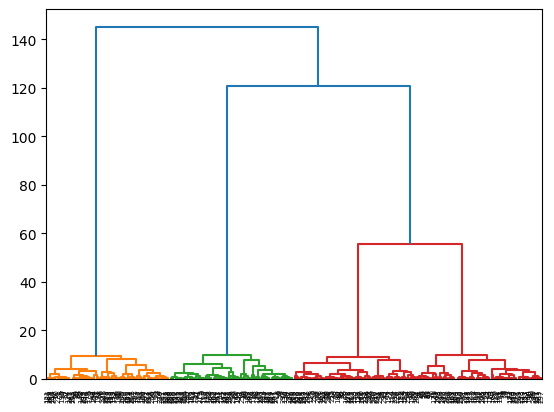

In [38]:
dendrogram(Z[0])

<!-- END QUESTION -->

### 4. Given to you is a generated dataset of 4 3D gaussian clusters with two overlapping.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def create_data():
    rng = np.random.default_rng(seed=42)
    cluster_1 = rng.normal(loc=[0, 0, 0], scale=1, size=(100, 3))
    cluster_2 = rng.normal(loc=[5, 5, 5], scale=1, size=(100, 3))
    cluster_3 = rng.normal(loc=[2, 2, 2], scale=1.5, size=(100, 3))
    cluster_4 = rng.normal(loc=[8, 8, 8], scale=1, size=(100, 3))
    X = np.vstack((cluster_1, cluster_2, cluster_3, cluster_4))
    return X

### 4a. Use Gaussian Mixture Models (GMM) to identify clusters. Return the `k_values, bics, and silhouette scores`. Please convert all values to `float`.

#### The Bayesian Information Criterion (BIC) is a statistical measure used to evaluate the goodness of fit of a model while penalizing for complexity.
This is how it works:
1. BIC assesses how well a model fits the data. **A lower BIC value** indicates a better fit.
2. BIC includes a **penalty term** for the number of parameters in the model. (**Discourages overfitting**)
3. **BIC = -2 log(L) + k log(n)**      ; L - Likelihood of the model, k - number of parameters, n - number of data points.



#### NOTE:
- Use `gmm.bic(X)` to find the `bic score` for a given k_value.
- For `silhoutte score` computation, use the `labels of the data points` by performing gmm model prediction.

#### K selection using BIC for GMMs - https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.bic

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
def evaluate_gmm(X):
    bics = []
    silhouette_scores = []
    k_values = range(2, 10)
    for k in k_values:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(X)
        # Calculate BIC and silhouette score
        bic = float(gmm.bic(X))
        labels = gmm.predict(X)  # Get cluster labels from the GMM
        silhouette = float(silhouette_score(X, labels)) if len(set(labels)) > 1 else float('nan')  # Handle case for single cluster
        
        bics.append(bic)
        silhouette_scores.append(silhouette)
    
    return list(k_values), bics, silhouette_scores


In [44]:
X = create_data()
evaluate_gmm(X)

([2, 3, 4, 5, 6, 7, 8, 9],
 [4900.710441586735,
  4817.582974705936,
  4795.339998185024,
  4848.723796428509,
  4899.5805024174615,
  4956.092666089735,
  4995.896872672212,
  5044.799517517117],
 [0.5926474039201303,
  0.5413663603712822,
  0.47159950225127145,
  0.44617608336369274,
  0.39424319440069366,
  0.3016752021784722,
  0.21534319485551087,
  0.2194509522645113])

In [45]:
grader.check("q4a")

q4a results: All test cases passed!

4b. Determine the optimal k by using the `bic` metric to find the best number of clusters. Return the `best_k_bic`

In [51]:
def optimal_k(X):
    k_values, bics, silhouette_scores = evaluate_gmm(X)
    best_bic = float("inf")
    best_k = None
    for i in range(len(bics)):
        if bics[i] < best_bic:
            best_bic = bics[i]
            best_k = i
    
    return k_values[best_k]

In [53]:
grader.check("q4b")

q4b results: All test cases passed!

<!-- BEGIN QUESTION -->

4c. Visualize clusters with the best k. Plot a 3D plot and color the points based on the `gmm labels`.
Please make sure you `call the function` to display your plot.

In [54]:
def plot_clusters(X):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    best_k = optimal_k(X)
    gmm = GaussianMixture(n_components=best_k)
    gmm.fit(X)
    labels = gmm.predict(X)  # Get cluster labels
    
    # Create a scatter plot of the data points colored by cluster label
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)  # Adjust the dimensions as needed
    ax.set_title(f'Clusters visualized for k={best_k} using GMM')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    plt.show()

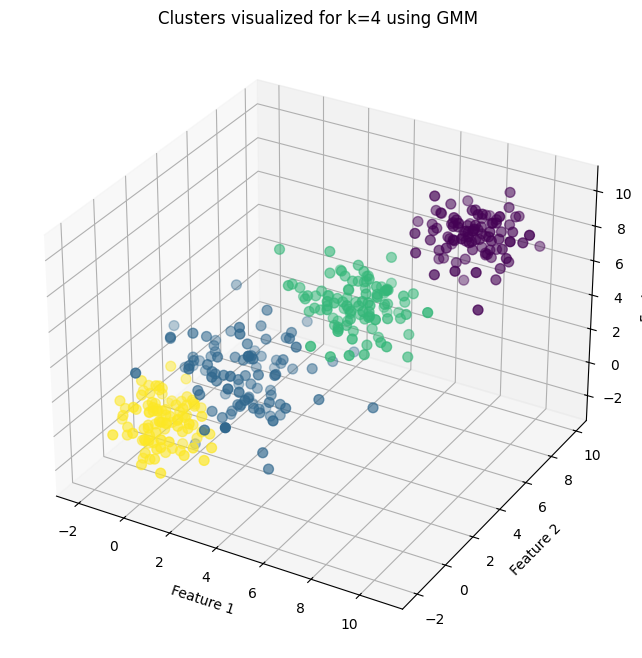

In [55]:
plot_clusters(X)

<!-- END QUESTION -->

### 5. In this question we will implement GMM from scratch. We have filled up most of the code up for you, and require you to fill in the incomplete portions.
#### Imagine you’re running a coffee shop and you have data on your customers’ preferences for coffee.

##### Each customer likes a different blend of beans, which you can represent as a point in two dimensions: 

* sweetness (x-axis)
* acidity (y-axis). 

##### Your goal is to `identify the three most popular blends (clusters)` from a pile of customer reviews that provide noisy measurements of these two characteristics.

- To do this, we will implement `GMM using the EM algorithm` and cluster the data.
1.	Expectation Step (E-step): The model takes a guess about the `likelihood that each customer belongs to each blend`. At this point, it might not be sure, so it assigns probabilities `(soft assignments)` based on how close the customers’ preferences are to the different blends.
2.	Maximization Step (M-step): The model then `updates its guess about the actual parameters` of the coffee blends -- essentially `adjusting the mean, variance, and proportion of customers for each blend`, based on the soft assignments from the previous step.

#### The EM algorithm is like refining a recipe. Each time you taste-test (E-step) and then tweak the ingredients (M-step), the blend becomes more representative of what customers want.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
def create_data_gmm():
    np.random.seed(42)

    # Means and covariances for three Gaussian distributions (coffee blends)
    means = np.array([[2, 3], [8, 7], [5, 10]])  # sweetness and acidity means
    covariances = [np.array([[1, 0.5], [0.5, 1]]),  # covariance matrix for blend 1
                np.array([[1, -0.3], [-0.3, 1]]),  # covariance matrix for blend 2
                np.array([[1, 0], [0, 1]])]  # covariance matrix for blend 3

    # Number of points in each cluster (representing customers)
    points_per_cluster = 100

    # Generate points from each Gaussian distribution
    X1 = np.random.multivariate_normal(means[0], covariances[0], points_per_cluster)
    X2 = np.random.multivariate_normal(means[1], covariances[1], points_per_cluster)
    X3 = np.random.multivariate_normal(means[2], covariances[2], points_per_cluster)

    # Combine all points into one dataset
    X = np.vstack((X1, X2, X3))
    return X

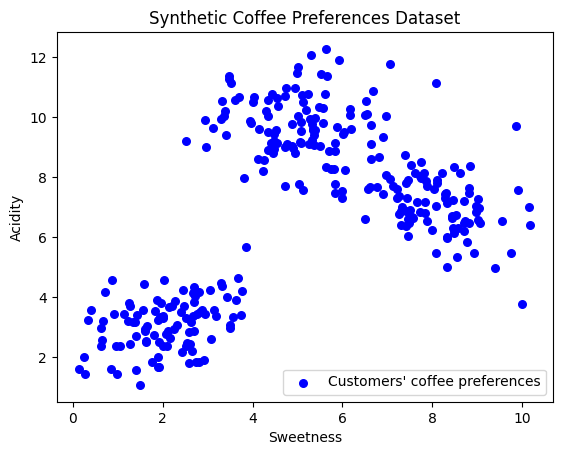

In [57]:
X = create_data_gmm()
plt.scatter(X[:, 0], X[:, 1], s=30, color='b', label="Customers' coffee preferences")
plt.title('Synthetic Coffee Preferences Dataset')
plt.xlabel('Sweetness')
plt.ylabel('Acidity')
plt.legend()
plt.show()

#### For the initialization of the parameters, we can do as shown below:

In [58]:
def initialize_params(X, n_clusters):
    np.random.seed(42)
    n_samples, n_features = X.shape

    #Randomly initialize means from the data
    means = X[np.random.choice(n_samples, n_clusters, False)]
    
    #initialize covariances as identity matrices
    covariances = [np.eye(n_features) for _ in range(n_clusters)]
    
    #initialize equal weights for the mixture components
    weights = np.ones(n_clusters) / n_clusters

    return means, covariances, weights

### 5a) First, complete the code which would help perform the `expectation step` of the EM algorithm. 
- You are required to fill in the correct code that would compute the `responsibility` (posterior probability that a point belongs to a cluster)
- Remember that the `responsibility calculation uses the initialized parameters` (means, covariances, and weights). 
- Use the `multivariate_normal` function to `compute the pdf` of the multivariate Gaussian.
- Return the computed `responsibilities` array. Please don't forget to normalize the responsibilities before returning it.

In [59]:
from scipy.stats import multivariate_normal
def expectation_step(X, means, covariances, weights):
    n_samples, n_clusters = X.shape[0], len(means)
    responsibilities = np.zeros((n_samples, n_clusters))     #initialize the responsibilities as a np array of 0s
    #compute the responsibilities by iterating over each cluster (for each k, compute responsibilities)
    for k in range(n_clusters):
        responsibilities[:, k] = weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])
    
    # Normalize the responsibilities across clusters for each sample
    responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)  # Sum over clusters for each sample
    responsibilities = responsibilities / responsibilities_sum  # Normalize to get probabilities

    return responsibilities

In [60]:
grader.check("q5a")

q5a results: All test cases passed!

### 5b) Secondly, complete the code which would help perform the `maximization step` of the EM algorithm. 
- In the below code, you are required to complete the code for `computing the covariances`.
- As a refresher, the update formulas are given below.

**Mean Update**

$$
\mu_k = \frac{\sum_{i=1}^{N} \gamma_{ik} x_i}{\sum_{i=1}^{N} \gamma_{ik}}
$$


**Covariance Update**

$$
\Sigma_k = \frac{\sum_{i=1}^{N} \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^{N} \gamma_{ik}}
$$


**Weights Update**

$$
\pi_k = \frac{\sum_{i=1}^{N} \gamma_{ik}}{N}
$$


Where:
- $\gamma_{ik}$ is the responsibility of component $k$ for data point $i$.
- $N$ is the total number of data points.
- $x_i$ is the data point.

In [61]:
def maximization_step(X, responsibilities):
    n_samples, n_clusters = responsibilities.shape
    n_features = X.shape[1]
    
    #initialize parameters
    means = np.zeros((n_clusters, n_features))
    covariances = []
    weights = np.zeros(n_clusters)
    
    for k in range(n_clusters):
        # effective number of points assigned to cluster k
        Nk = responsibilities[:, k].sum()
        
        #update the means
        means[k] = (X * responsibilities[:, k][:, np.newaxis]).sum(axis=0) / Nk
        #update the covariance matrices
        covariance_k = np.zeros((n_features, n_features)) 

         
        for i in range(n_samples):
            diff = X[i] - means[k]  # Difference from the mean
            covariance_k += responsibilities[i, k] * np.outer(diff, diff)  # Outer product

        covariances.append(covariance_k / Nk)
        
        #update the weights (mixture proportions)
        weights[k] = Nk / n_samples
    
    return means, covariances, weights

In [62]:
grader.check("q5b")

q5b results: All test cases passed!

### 5c) Complete the code which would help compute the `log-likelihood` of the multivariate normal distribution using the `3 calculated parameters` (mean, covariance, and weights) from the EM steps.

**Log-Likelihood Calculation:**

$$
\log L(\theta) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)
$$


Where:
- $\log L(\theta)$ is the log-likelihood of the parameters $\theta$.
- $N$ is the total number of data points.
- $K$ is the number of components.
- $\pi_k$ is the mixing coefficient for component $k$.
- $\mathcal{N}(x_i \mid \mu_k, \Sigma_k)$ is the Gaussian probability density function for data point $x_i$ given mean $\mu_k$ and covariance $\Sigma_k$.

In [63]:
def log_likelihood(X, means, covariances, weights):
    n_samples, n_clusters = X.shape[0], len(means)
    probs = np.zeros((n_samples, n_clusters))
    log_likelihood = 0
    for k in range(n_clusters):
        probs[:, k] = weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])

    total_probs = probs.sum(axis=1)
    # Calculate the log-likelihood
    log_likelihood = np.sum(np.log(total_probs))
    return log_likelihood

In [64]:
grader.check("q5c")

q5c results: All test cases passed!

### 5d) Write a function `em_algorithm` which would:
1. `Initialize` the parameters
2. Iteratively perform the `expectation step`
3. Perform the `maximization step`
4. Compute the`Log-likelihood` of the multivariate Gaussian
5. Check for `convergence `
6. Return `means, covariances, weights, responsibilities, log_likelihoods`

- You can do this by calling the appropriate functions that you completed from 5a) through 5c) until step 4.
- For step 5, check if the last and penultimate log likelihoods have a difference below a threshold value `tol` and break if that condition is satisfied.

In [75]:
def em_algorithm(X, n_iters=100, tol=1e-4):
    log_likelihoods = [] # use this list to store all the log-likelihood values
    n_clusters = 3
    means, covariances, weights = initialize_params(X, n_clusters)
    for _ in range(n_iters):
        responsibilities = expectation_step(X, means, covariances, weights)
        means, covariances, weights = maximization_step(X, responsibilities)
        log_prob = log_likelihood(X, means, covariances, weights)
        log_likelihoods.append(log_prob)
        
        # Check for convergence
        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break
    
    return means, covariances, weights, responsibilities, log_likelihoods


In [76]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

### 5e) Run the below code to visualize your GMM clusters means.

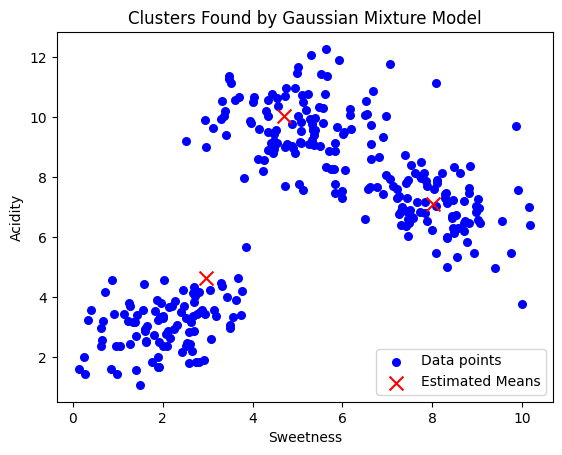

In [77]:
n_clusters = 3
means, covariances, weights, responsibilities, log_likelihoods = em_algorithm(X, n_clusters)

plt.scatter(X[:, 0], X[:, 1], s=30, color='b', label="Data points")
plt.scatter(means[:, 0], means[:, 1], s=100, color='r', label="Estimated Means", marker='x')
plt.title('Clusters Found by Gaussian Mixture Model')
plt.xlabel('Sweetness')
plt.ylabel('Acidity')
plt.legend()
plt.show()

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. 
Please submit the completed notebook on Gradescope to view your results!